### Problem Statement:

The objective of this study is to segment the similar user and similar items in to clusters. Understanding the common charecteristic of each group will help the organization to promote their bussiness.

The datasets used in this work is a Breast Cancer dataset and we need to cluster the Benign and Malignant Cases.

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('data.csv')

FILE DESCRIPTION

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df_new=df.drop(['id','diagnosis'],axis=1)

In [7]:
df_new.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
df_new.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [9]:
df_new.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
def correlation_heat_map(dff):
    corrs = dff.corr()

    # Set the figure size
    fig, ax = plt.subplots(figsize=(20,18))

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    plt.show()

C:\Users\akris\AppData\Local\Temp\ipykernel_21484\1073459400.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corrs, dtype=np.bool)


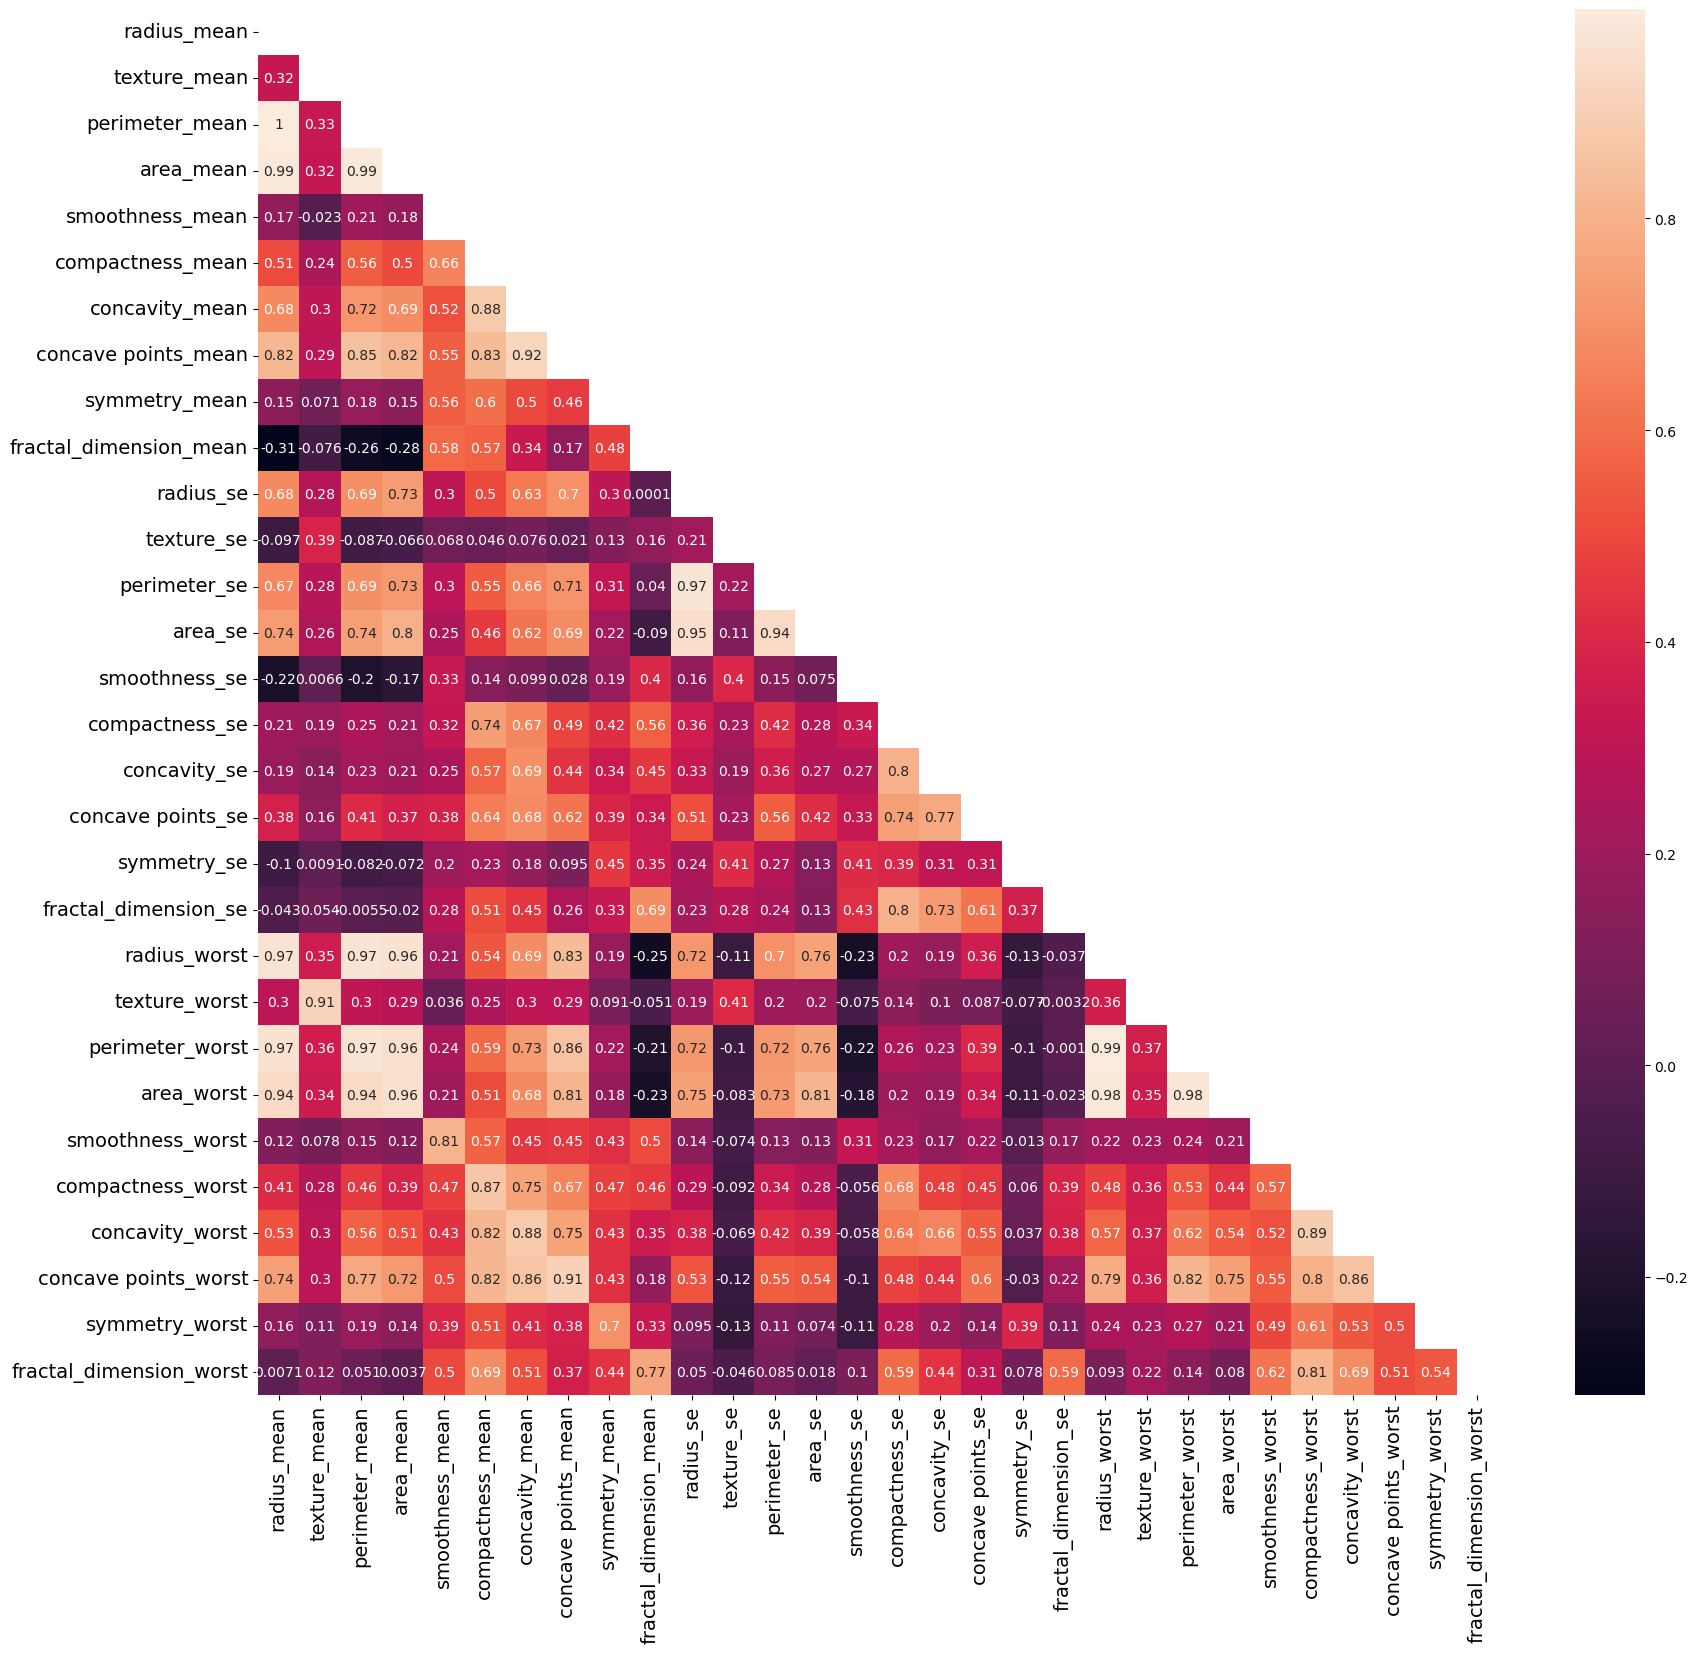

In [11]:
correlation_heat_map(df_new)

C:\Users\akris\AppData\Local\Temp\ipykernel_21484\2144019678.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[df_new.corr() > 0.8],annot = True)


<Axes: >

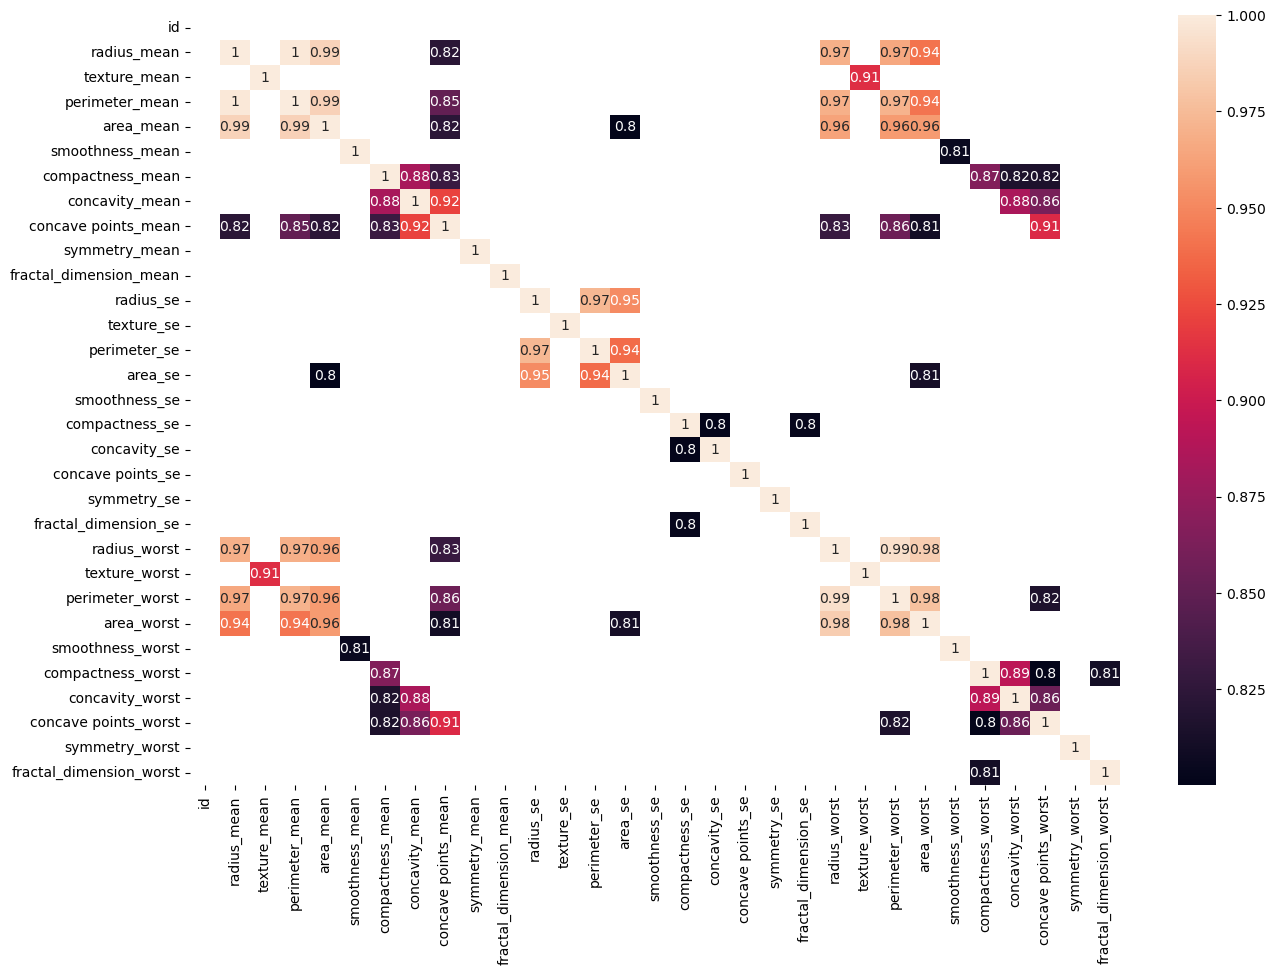

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr()[df_new.corr() > 0.8],annot = True)

In [13]:
# import seaborn as sns
# sns.pairplot(df_new,diag_kind='kde')

In [14]:
m_sc=MinMaxScaler()
df_scale=pd.DataFrame(m_sc.fit_transform(df_new),columns=df_new.columns)

In [15]:
df_scale.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


**K-MEANS CLUSTERING ALGORITHM:**

**Finding the best K value:**

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

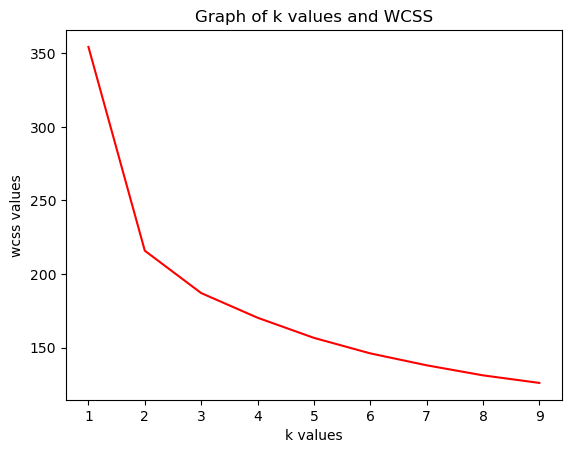

In [16]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scale)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

In [17]:
# Now we know our best k value is 2/3, I am creating a new kmeans model:
kmeans2 = KMeans(n_clusters=2)

# Training the model:
m1=kmeans2.fit(df_scale)
clusters = m1.predict(df_scale)

# Adding a label feature with the predicted class values:
df_k = df_new.copy(deep=True)
df_k['label'] = clusters

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [18]:
m1.inertia_

215.8383197204485

In [19]:
df_k.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [20]:
centroids=m1.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_scale) )
centroid_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.255354,0.288335,0.246964,0.143884,0.357431,0.180195,0.103448,0.13066,0.340118,0.255916,...,0.205241,0.320690,0.192421,0.099434,0.357112,0.148739,0.131423,0.262314,0.226394,0.154374
1,0.504836,0.395603,0.505787,0.363766,0.469887,0.422263,0.418387,0.46928,0.458997,0.299459,...,0.480474,0.451074,0.465530,0.314606,0.498688,0.363915,0.390273,0.658272,0.337523,0.260414


The above centroid_df showing the feature mean values for each cluster and we can see resonable difference in these values across differnt groups. 


In [21]:
print('Original Data Classes:')
print(df.diagnosis.value_counts())
print('Predicted Data Classes:')
print(df_k.label.value_counts())

Original Data Classes:
B    357
M    212
Name: diagnosis, dtype: int64
Predicted Data Classes:
0    380
1    189
Name: label, dtype: int64



* Comparing the cluster labels with original labels('diagnosis') column of this dataset shows that the number of observations in each cluster are approximately same.
* It indicates that, Category B is similar to Label 0, and Category M is similar to Label 1.
* We can depict the same with the boxplot of any variable by label/diagnosis.



<Axes: title={'center': 'radius_mean'}, xlabel='label'>

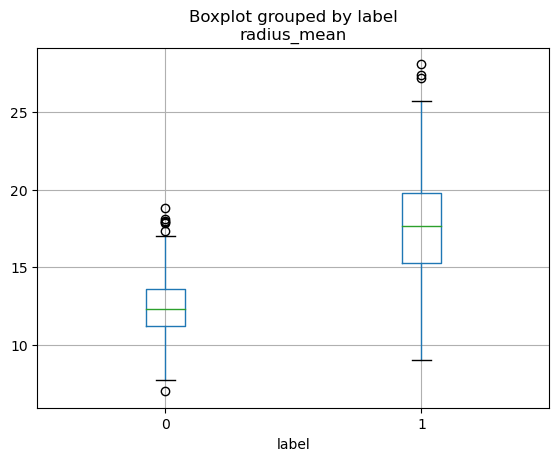

In [22]:
df_k.boxplot(column='radius_mean',by='label')

<Axes: title={'center': 'radius_mean'}, xlabel='diagnosis'>

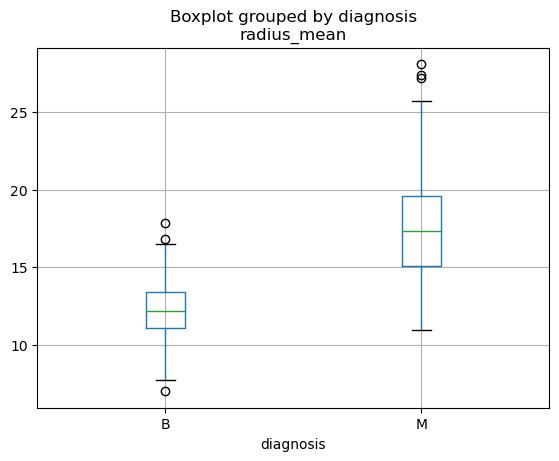

In [23]:
df.boxplot(column='radius_mean',by='diagnosis')

**HIERARCHICAL CLUSTERING ALGORITHM:**

**Creating the Dendrogram:**

We use dendrogram to find how many classes we have in our data set.

In [104]:
from scipy.cluster.hierarchy import cophenet,linkage, dendrogram
from scipy.spatial.distance import pdist

plt.figure(figsize=[10,10])
merg = linkage(df_scale, method='ward')
c,coph_dists=cophenet(merg,pdist(df_scale))
print(c)
#print(coph_dists)
#print(len(coph_dists))

0.6329403391412314


<Figure size 1000x1000 with 0 Axes>

In [105]:
coph_dists

array([ 4.83461412,  4.83461412,  8.1845307 , ...,  4.83461412,
       15.97609324, 15.97609324])

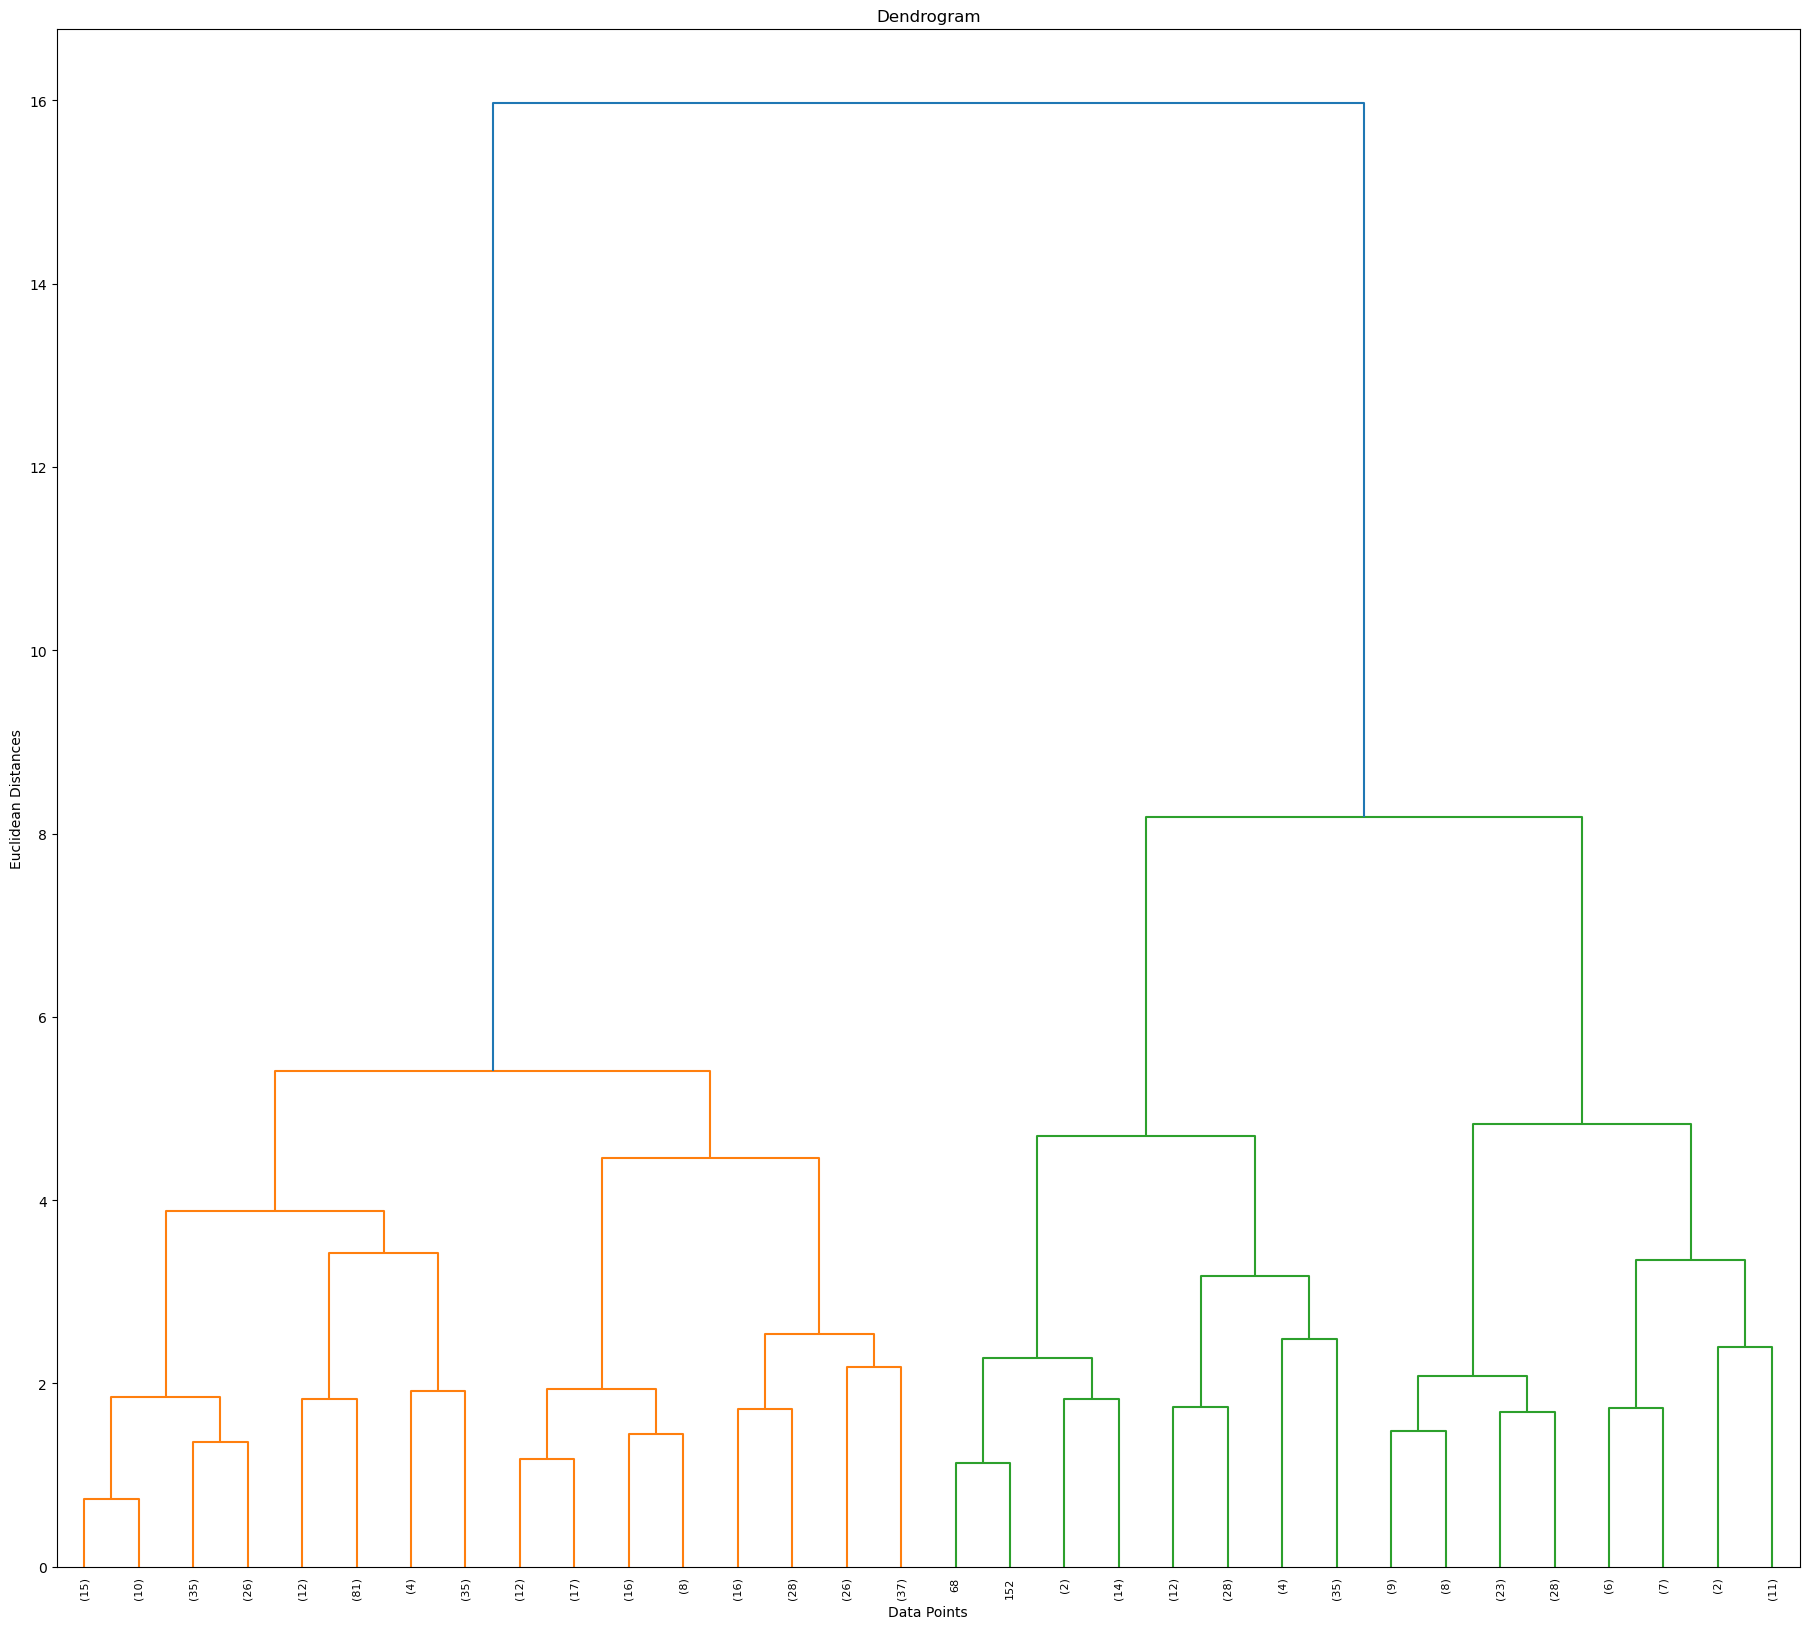

In [111]:
plt.figure(figsize=(18,16))
dendrogram(merg, leaf_rotation=90.0,color_threshold=15,leaf_font_size=8,truncate_mode='level',p=4)
plt.tight_layout()
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [112]:
from sklearn.cluster import AgglomerativeClustering

hie_clus = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hie=hie_clus.fit(df_scale)
cluster2 = hie.fit_predict(df_scale)

df_h = df_new.copy(deep=True)
df_h['label'] = cluster2

In [27]:
print('Original Data Classes:')
print(df.diagnosis.value_counts())
print('Predicted Data Classes:')
print(df_h.label.value_counts())

Original Data Classes:
B    357
M    212
Name: diagnosis, dtype: int64
Predicted Data Classes:
1    378
0    191
Name: label, dtype: int64



* Comparing the cluster labels of AgglomerativeClustering with original labels('diagnosis') column of this dataset shows that the number of observations in each cluster are approximately same.
* It indicates that, Category B is similar to Label 1, and Category M is similar to Label 0.
* We can depict the same with the boxplot of any variable by label/diagnosis.


<Axes: title={'center': 'smoothness_worst'}, xlabel='label'>

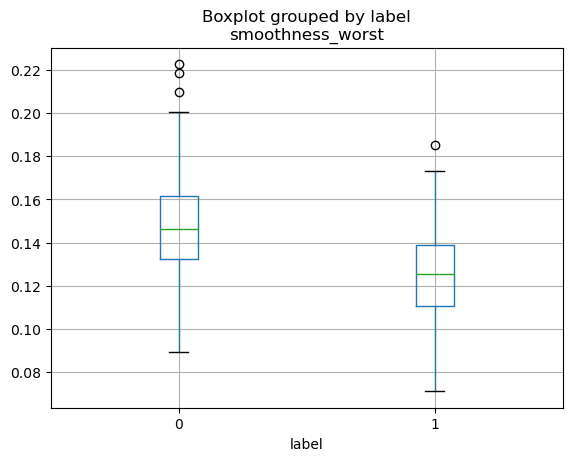

In [28]:
df_h.boxplot(column='smoothness_worst',by='label')

<Axes: title={'center': 'smoothness_worst'}, xlabel='diagnosis'>

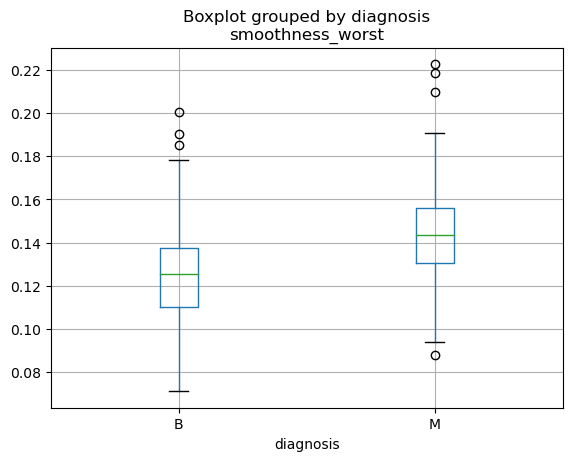

In [29]:
df.boxplot(column='smoothness_worst',by='diagnosis')

In [30]:
# Adding a label feature with the predicted class values:
df_labeled_hie = df_scale.copy(deep=True)
df_labeled_hie['class'] = hie.labels_

In [31]:
pd.crosstab(df_labeled_hie['class'],df['diagnosis'])

diagnosis,B,M
class,,
0,27,164
1,330,48


* Find the Inertia for Agglomarative Clustering

In [32]:
AGC_clusters = df_labeled_hie.groupby(['class'])
Df0=AGC_clusters.get_group(0)
Df1=AGC_clusters.get_group(1)

In [33]:
Df0.shape,Df1.shape

((191, 31), (378, 31))

In [34]:
C0=np.array(Df0.mean())
C1=np.array(Df1.mean())

In [35]:
C0=C0[:-1]
C0

array([0.47346083, 0.39318008, 0.47607112, 0.3386956 , 0.47610657,
       0.43281737, 0.41714022, 0.45401934, 0.46572267, 0.33800619,
       0.18413109, 0.19899338, 0.17439343, 0.12406346, 0.19895324,
       0.28516069, 0.13446243, 0.31843658, 0.19859197, 0.15354004,
       0.44900587, 0.44480291, 0.43754734, 0.29212519, 0.50393059,
       0.37244296, 0.39185053, 0.63974326, 0.33495675, 0.28051886])

In [36]:
C1=C1[:-1]
C1

array([0.26988697, 0.28899142, 0.26060971, 0.15538802, 0.35369322,
       0.1735809 , 0.10241121, 0.13657991, 0.33609107, 0.23620806,
       0.06704057, 0.18443821, 0.06147053, 0.03159695, 0.17210759,
       0.11849159, 0.05329301, 0.17546017, 0.167811  , 0.07323709,
       0.21968514, 0.32316874, 0.20511585, 0.10965533, 0.35371347,
       0.14329155, 0.12925615, 0.269581  , 0.22710282, 0.1436536 ])

In [37]:
AGC_I0=0
AGC_I1=0
for i in np.arange(Df0.shape[0]):
  AGC_I0=AGC_I0+np.sum((Df0.iloc[i,:-1]-C0)**2)
for i in np.arange(Df1.shape[0]):  
  AGC_I1=AGC_I1+np.sum((Df1.iloc[i,:-1]-C1)**2)

In [38]:
AGC_I0,AGC_I1

(130.37901975331175, 96.43981605118276)

In [39]:
total_inertia_AGC=AGC_I0+AGC_I1

In [40]:
# AGC Inertia
total_inertia_AGC

226.8188358044945

In [41]:
# K_means Inertia
m1.inertia_

215.8383197204485

In [42]:
# Calculate Silloutte Score 
from sklearn import metrics
metrics.silhouette_score(df_scale,m1.labels_)

0.3845494883485513

In [43]:
# Calculate Silloutte Score 
from sklearn import metrics
metrics.silhouette_score(df_scale,hie.labels_)

0.3670605426711493

In [44]:
#Sub cluster analysis

In [45]:
Df0.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,class
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0


In [46]:
Df1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,class
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,...,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.0
mean,0.269887,0.288991,0.260610,0.155388,0.353693,0.173581,0.102411,0.136580,0.336091,0.236208,...,0.323169,0.205116,0.109655,0.353713,0.143292,0.129256,0.269581,0.227103,0.143654,1.0
std,0.102093,0.135388,0.099145,0.076337,0.111508,0.079847,0.071618,0.086578,0.114015,0.109240,...,0.149290,0.088537,0.061764,0.124768,0.074375,0.085463,0.133689,0.084300,0.068990,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.205949,0.195637,0.198276,0.107010,0.275210,0.113015,0.049783,0.078628,0.262247,0.154170,...,0.212553,0.151265,0.070586,0.260219,0.084830,0.063476,0.189639,0.171348,0.092762,1.0
50%,0.260258,0.276124,0.253922,0.142842,0.342466,0.165251,0.088812,0.120403,0.329293,0.225779,...,0.304504,0.191294,0.096171,0.359440,0.137245,0.117013,0.271821,0.222945,0.139250,1.0
75%,0.325098,0.355005,0.310466,0.188706,0.425882,0.229625,0.144025,0.172552,0.408965,0.304075,...,0.406850,0.248344,0.132515,0.446114,0.190267,0.185383,0.349313,0.282279,0.181556,1.0
max,0.623740,0.815015,0.603345,0.479533,0.762571,0.450034,0.346298,0.421869,0.850000,0.627633,...,0.793177,0.511928,0.361728,0.751700,0.369561,0.381709,0.681787,0.653854,0.405090,1.0


In [47]:
from sklearn.decomposition import PCA

In [48]:
model=PCA(n_components=30)
pca_val=model.fit_transform(df_scale)
# X_std 
#Cov
# Eigen val, vectors
# Dot Prod Eigen Vect , X_std
# pc1,pc2,pc3......pc8
pca_val.shape

(569, 30)

In [49]:
pca_val.shape

(569, 30)

In [50]:
model.components_
# Eigen Vectors

array([[ 2.42675774e-01,  9.64786101e-02,  2.52550175e-01,
         2.16494530e-01,  1.09694618e-01,  2.40397602e-01,
         3.01914206e-01,  3.22475470e-01,  1.11431911e-01,
         4.32983397e-02,  1.21760615e-01, -3.91796003e-05,
         1.18580603e-01,  1.03569266e-01, -4.68418094e-03,
         1.29319789e-01,  6.56807080e-02,  1.24746120e-01,
         1.44902467e-02,  4.55013416e-02,  2.59386850e-01,
         1.13833007e-01,  2.60708399e-01,  2.05917767e-01,
         1.23773566e-01,  2.04993413e-01,  2.44083623e-01,
         3.71065064e-01,  9.59229054e-02,  9.46335142e-02],
       [-2.61316697e-01, -5.90579194e-02, -2.38590061e-01,
        -2.31106830e-01,  1.99883951e-01,  2.13914883e-01,
         1.13810591e-01, -8.31206237e-03,  2.11115126e-01,
         4.06392087e-01, -6.68985209e-02,  6.00114468e-02,
        -5.14164640e-02, -8.29631528e-02,  1.35596439e-01,
         2.22352585e-01,  1.02792720e-01,  1.05646780e-01,
         1.40474907e-01,  1.71995173e-01, -2.44281614e-

In [51]:
model.explained_variance_
# Eigen Values

array([3.31333895e-01, 1.07850379e-01, 4.43946960e-02, 4.00067758e-02,
       2.54974214e-02, 1.91663746e-02, 9.86455414e-03, 7.43487962e-03,
       6.16787788e-03, 5.89966049e-03, 5.30030347e-03, 4.72983465e-03,
       4.09747531e-03, 2.96286209e-03, 1.68122351e-03, 1.60840891e-03,
       1.14664979e-03, 9.43947447e-04, 8.59374395e-04, 6.61194278e-04,
       6.13438074e-04, 4.89532042e-04, 3.29513757e-04, 3.18235822e-04,
       2.68369249e-04, 2.05683889e-04, 1.18919755e-04, 3.48885602e-05,
       1.80317678e-05, 3.72191663e-06])

In [52]:
tot=sum(model.explained_variance_)
var_exp=[(i/tot)*100 for i in sorted(model.explained_variance_,reverse=True)]
cum_var=np.cumsum(var_exp)
print("Cumulative Variance",cum_var)

Cumulative Variance [ 53.09768941  70.38117901  77.49562102  83.90687985  87.99295188
  91.0644463   92.64528376  93.83675537  94.82518447  95.77063058
  96.62002713  97.37800359  98.03464173  98.50945319  98.77887653
  99.03663101  99.2203866   99.37165826  99.50937672  99.61533596
  99.71364207  99.79209169  99.8448977   99.89589637  99.9389037
  99.97186543  99.99092284  99.99651388  99.99940355 100.        ]


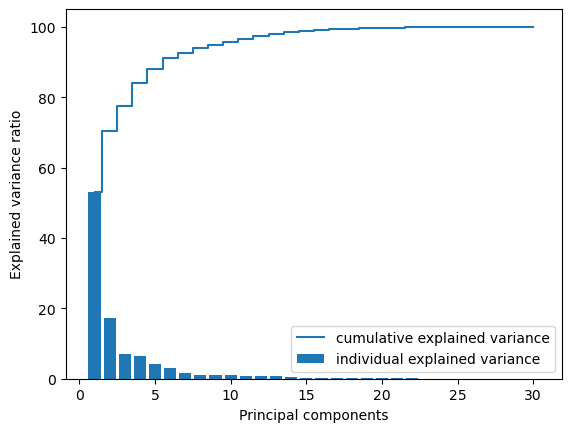

In [53]:
plt.bar(range(1,31), var_exp, align='center', label='individual explained variance')
plt.step(range(1,31),cum_var, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

#Training the model:
m1_pc=kmeans.fit(pca_val)
clusters = m1_pc.predict(pca_val)

pd.DataFrame(m1_pc.cluster_centers_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.699517,0.004204,0.008455,-0.010378,-0.006366,0.002099,-0.004067,0.006180,0.000235,0.002498,...,0.000469,-0.001472,0.001547,-0.000819,-0.000653,0.001193,-0.000078,0.000299,-0.000237,0.000078
1,-0.347918,-0.002091,-0.004205,0.005162,0.003166,-0.001044,0.002023,-0.003074,-0.000117,-0.001242,...,-0.000233,0.000732,-0.000770,0.000407,0.000325,-0.000593,0.000039,-0.000149,0.000118,-0.000039


In [55]:
m1_pc.inertia_

215.83831972044817

If we analyze the cluster centers of Principal Components, we can conclude that intial few (4-6) Principal components are enough to devide the data into clusters. 
First 6 components explain 91% variability in the data, which is enough to divide the data into clusters.

In [56]:
# sns.scatterplot(x = df_k['radius_mean'],y = df_k['compactness_mean'],data = df_k,hue=df_k['label'])

In [57]:
df_k.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# Random thing

In [100]:
import random
data1 = pd.DataFrame([(random.uniform(0, 99), random.uniform(0, 1)) for _ in range(50)])
data2 = pd.DataFrame([(random.uniform(150,200), random.uniform(1,2)) for _ in range(50)])
data3 = pd.DataFrame([(random.uniform(234, 346), random.uniform(2,3)) for _ in range(50)])
data4 = pd.DataFrame([(random.uniform(445, 499), random.uniform(3,4)) for _ in range(50)])

sample  =pd.concat([data1,data2,data3,data4],axis = 0)

In [101]:
sample.shape

(200, 2)

In [102]:
sample['ans'] = sample[0] * sample[1]

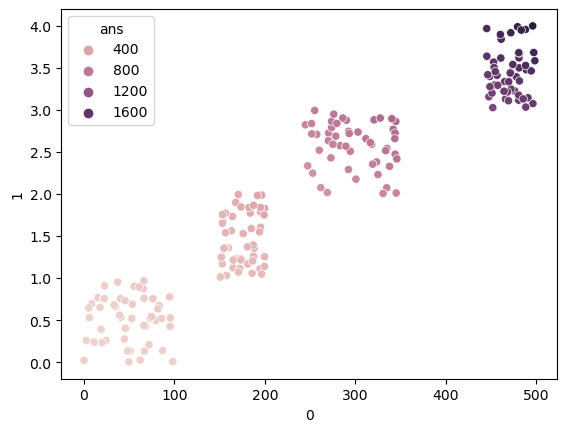

In [103]:
sns.scatterplot(data = sample, x=sample[0], y = sample[1], hue = sample['ans'])
plt.show()

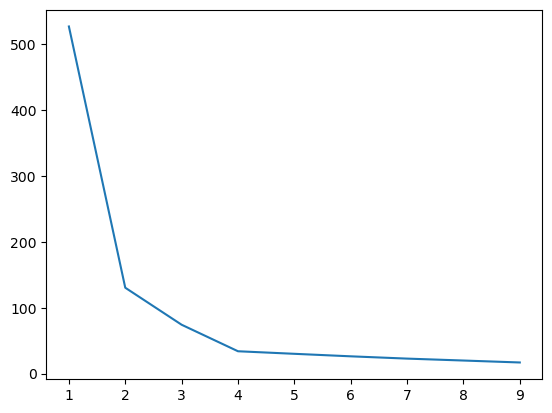

In [83]:
a = []
temp = sample.drop('ans',1)
for i in range(1,10):
    k = KMeans(n_clusters=i)
    k.fit(temp)
    a.append(k.inertia_)
plt.plot(range(1,10), a)

In [ ]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scale)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()